Problem 1:
    

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.


Dataset for Problem: Election_Data.xlsx

- Data Ingestion: 11 marks
    
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

- Data Preparation: 4 marks

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

- Modeling: 22 marks

1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


- Inference: 5 marks

1.8 Based on these predictions, what are the insights? (5 marks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

## Data Ingestion: 11 marks

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)
Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)
Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
# Reading the data

Election_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")
Election_df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


The dataset is having 1525 rows and 10 columns

In [3]:
#dropping Unnamed:0 Column

Election_df=Election_df.drop('Unnamed: 0',axis=1)

In [4]:
Election_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
Election_df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [6]:
Election_df.shape

(1525, 9)

In [7]:
Election_df.size

13725

In [8]:
print("no. of rows: ",Election_df.shape[0], "\n""no. of columns: ",Election_df.shape[1])

no. of rows:  1525 
no. of columns:  9


Now, The dataset is having 1525 rows and 9 columns

In [9]:
Election_df.describe(include = "all")

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [10]:
Election_df.describe().T #Descriptive summary

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
Election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [12]:
Election_df.skew() #Skewness 

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [13]:
Election_df.dtypes #Checking datatypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [14]:
Election_df.isnull().sum() #Ckecking null values

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 


In [15]:
categorical=[]
numeric=[]
for i in Election_df.columns:
    if Election_df[i].dtype=="object":
        categorical.append(i)
    else:
        numeric.append(i)
print(categorical) 
print(numeric)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [16]:
Election_df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [17]:
for feature in Election_df.columns:
    if Election_df[feature].dtype=='object':
        print(feature.upper() ," ",Election_df[feature].nunique())
        print(Election_df[feature].value_counts().sort_values())
            

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [18]:
for feature in Election_df.columns: 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Election_df[feature].unique()))
        print(pd.Categorical(Election_df[feature].nunique()))



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[2]
Categories (1, int64): [2]


feature: age
[43, 36, 35, 24, 41, ..., 86, 85, 87, 93, 91]
Length: 70
Categories (70, int64): [24, 25, 26, 27, ..., 90, 91, 92, 93]
[70]
Categories (1, int64): [70]


feature: economic.cond.national
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: economic.cond.household
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Blair
[4, 5, 2, 1, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Hague
[1, 4, 2, 5, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[5]
Categories (1, int64): [5]


feature: Europe
[2, 5, 3, 4, 6, ..., 1, 7, 9, 10, 8]
Length: 11
Categories (11, int64): [1, 2, 3, 4, ..., 8, 9, 10, 11]
[11]
Categories (1, int64): [11]


feature: political.knowledge
[2, 0, 3, 1]
Categories (4, int64): [0, 1, 2, 3]
[4]
Categories (1, int64):

In [19]:
dups=Election_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
Election_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [20]:
print('Before',Election_df.shape)
Election_df.drop_duplicates(inplace=True) 
print('After',Election_df.shape)

Before (1525, 9)
After (1517, 9)


In [21]:
Election_df['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

## Univariate & Multivariate Analysis:

Text(0.5, 1.0, 'Blair boxplot')

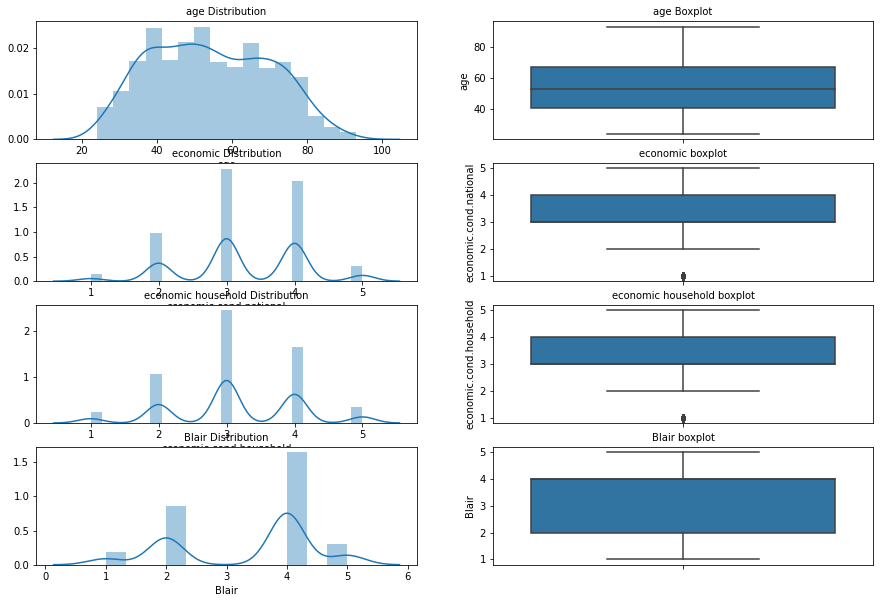

In [22]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(Election_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(Election_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(Election_df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(Election_df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(Election_df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(Election_df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(Election_df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(Election_df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

Text(0.5, 1.0, 'political knowledge boxplot')

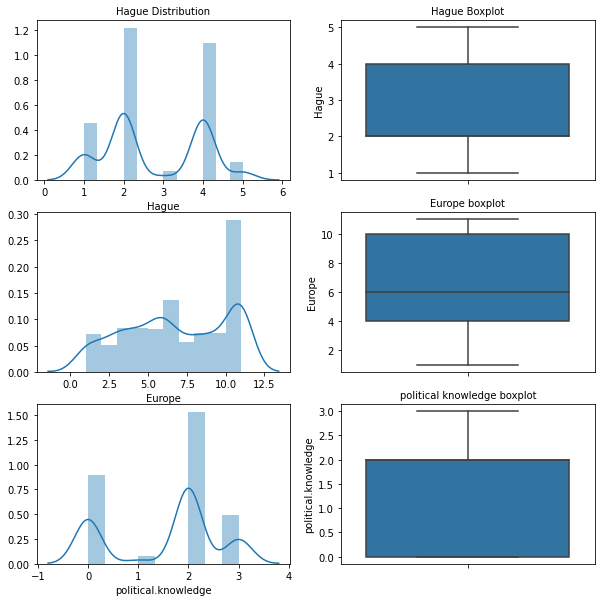

In [23]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,10)
a = sns.distplot(Election_df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(Election_df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(Election_df['Europe'], ax=axes[1][0])
#a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(Election_df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(Election_df['political.knowledge'], ax=axes[2][0])
#a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(Election_df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

In [24]:
Election_df.skew() #Skewness

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

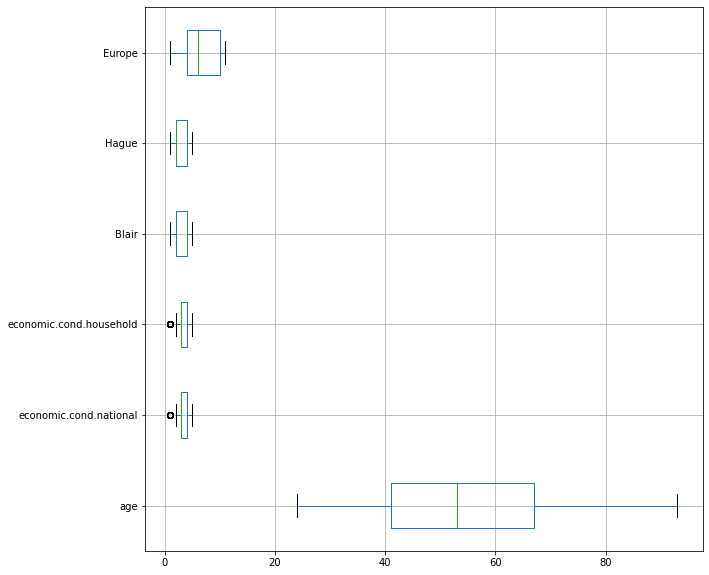

In [25]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
Election_df.iloc[:,:7].boxplot(vert=0)
plt.savefig('boxplot.png')
plt.show()

In [26]:
#only two features having outliers, they are: economic.cond.national & economic.cond.household

In [27]:
print("The proportion of outliers in economic.cond.national is", len(Election_df[Election_df["economic.cond.national"]<2])/Election_df.shape[0]*100)

The proportion of outliers in economic.cond.national is 2.4390243902439024


In [28]:
print("The proportion of outliers in economic.cond.household is", len(Election_df[Election_df["economic.cond.household"]<2])/Election_df.shape[0]*100)

The proportion of outliers in economic.cond.household is 4.284772577455504


<AxesSubplot:xlabel='vote', ylabel='count'>

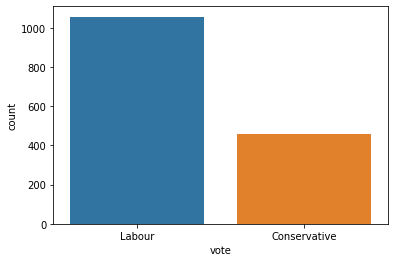

In [29]:
sns.countplot(data=Election_df, x='vote')

<AxesSubplot:xlabel='Blair', ylabel='count'>

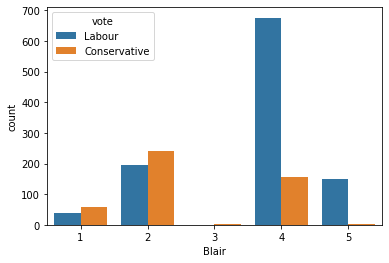

In [30]:
sns.countplot(data=Election_df, x='Blair', hue='vote')

<AxesSubplot:xlabel='Hague', ylabel='count'>

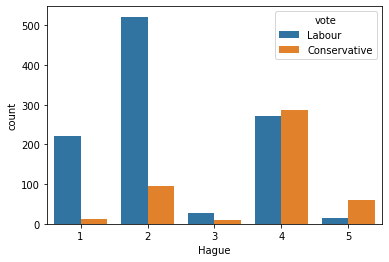

In [31]:
sns.countplot(data=Election_df, x='Hague', hue='vote')

<AxesSubplot:xlabel='gender', ylabel='count'>

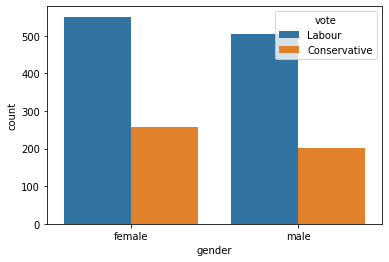

In [32]:
sns.countplot(data=Election_df, x='gender', hue='vote')

<AxesSubplot:xlabel='vote', ylabel='count'>

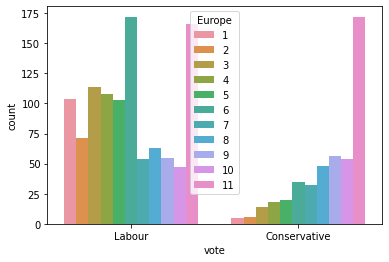

In [33]:
sns.countplot(data=Election_df, x='vote', hue='Europe')

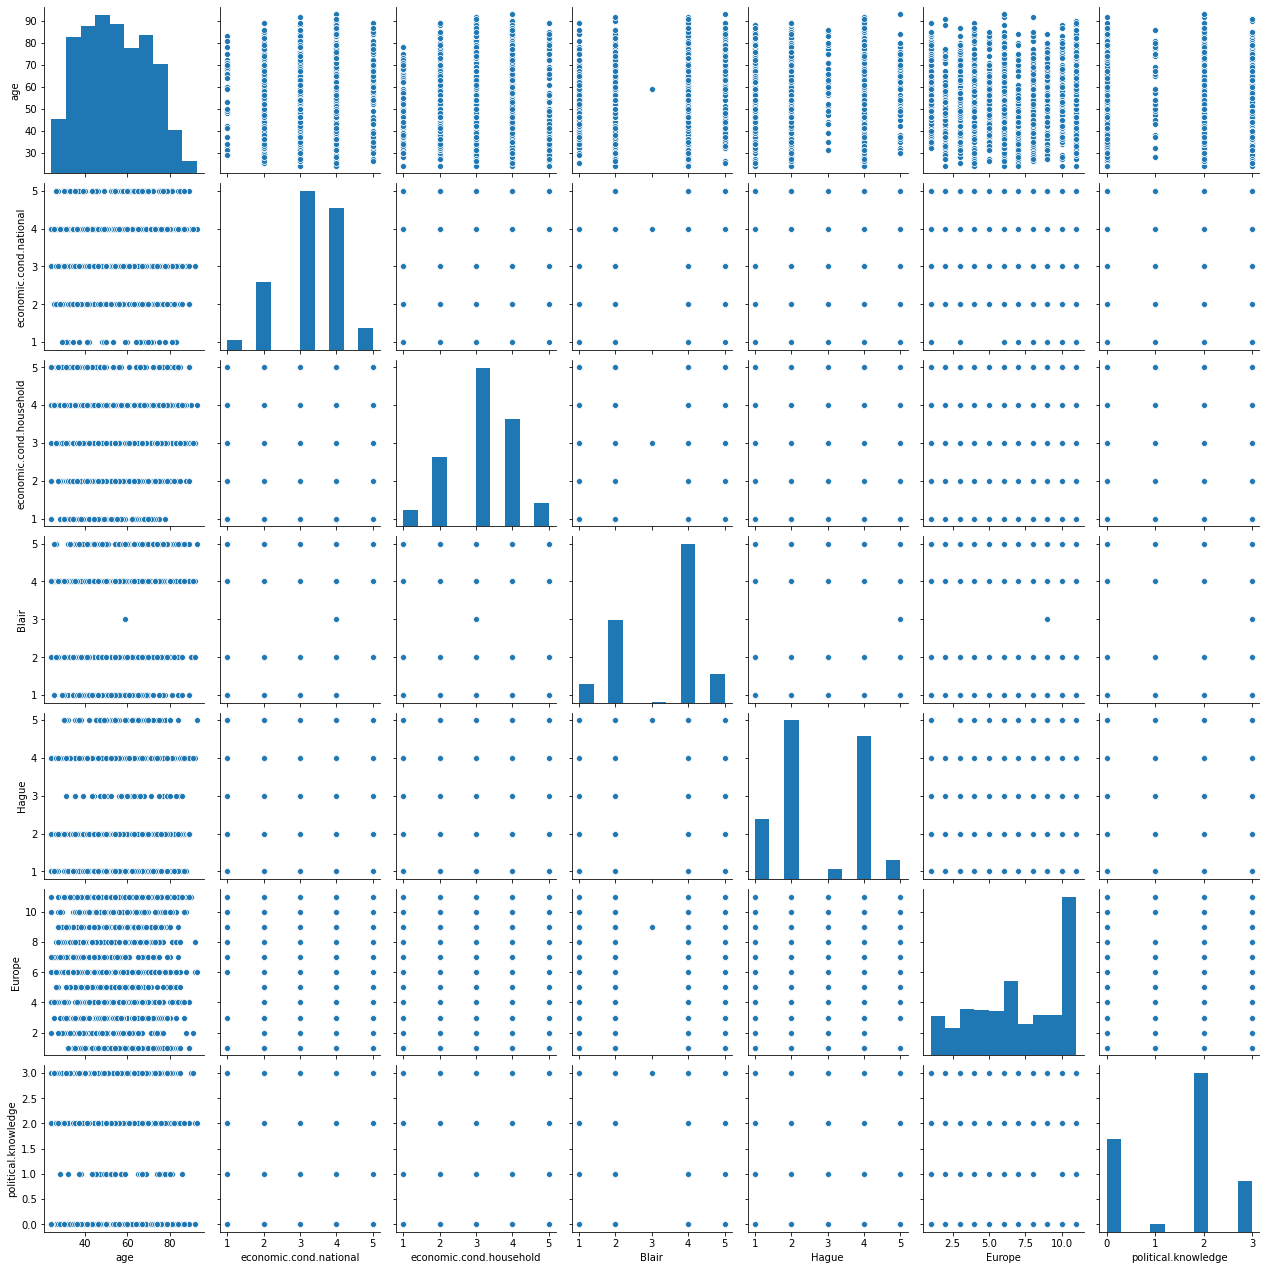

In [34]:
sns.pairplot(Election_df) #Pairplot
plt.savefig("Pairplot")

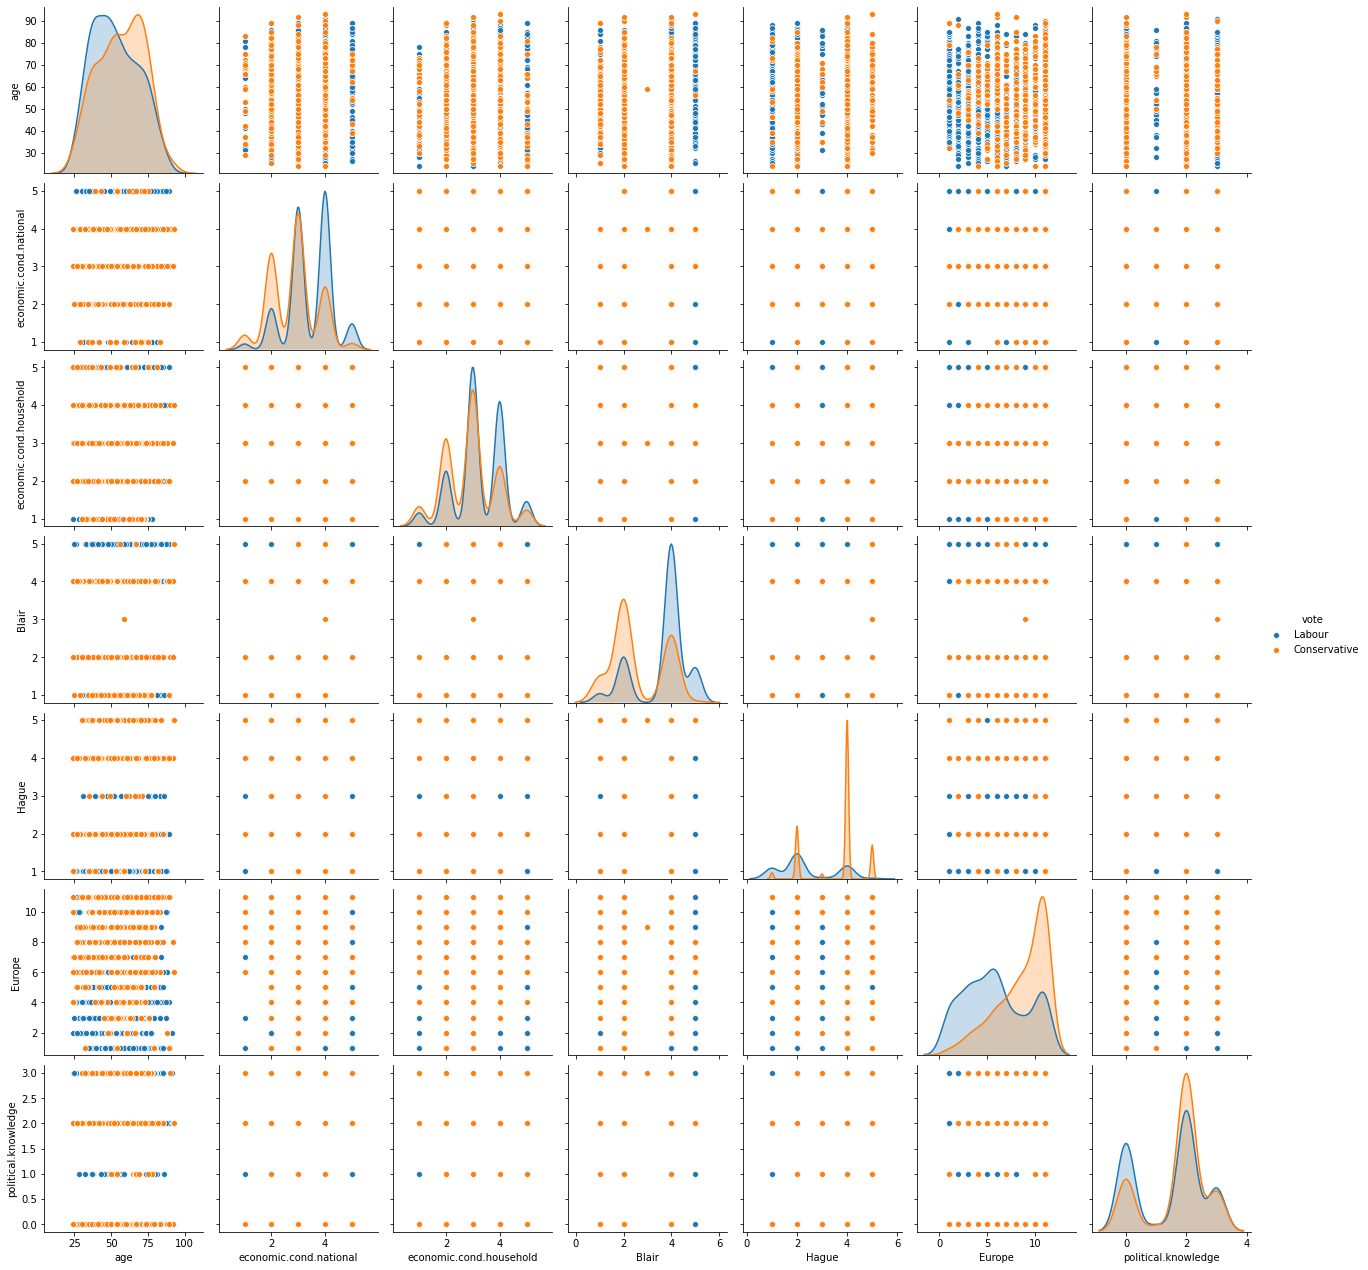

In [35]:
sns.pairplot(Election_df,hue= "vote") #Pairplot with hue as 'vote'

In [36]:
Election_df.cov() #Covariance Matrix

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,246.544655,0.258740,-0.568222,0.591818,0.602692,3.344366,-0.793429
economic.cond.national,0.258740,0.777558,0.285454,0.337851,-0.218216,-0.608432,-0.022481
economic.cond.household,-0.568222,0.285454,0.866890,0.236065,-0.115202,-0.346780,-0.038900
Blair,0.591818,0.337851,0.236065,1.380089,-0.352571,-1.146966,-0.027134
Hague,0.602692,-0.218216,-0.115202,-0.352571,1.519005,1.161811,-0.039970
Europe,3.344366,-0.608432,-0.346780,-1.146966,1.161811,10.883687,-0.540915
political.knowledge,-0.793429,-0.022481,-0.038900,-0.027134,-0.039970,-0.540915,1.175961


In [37]:
Election_df.corr() #Correlation Matrix

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


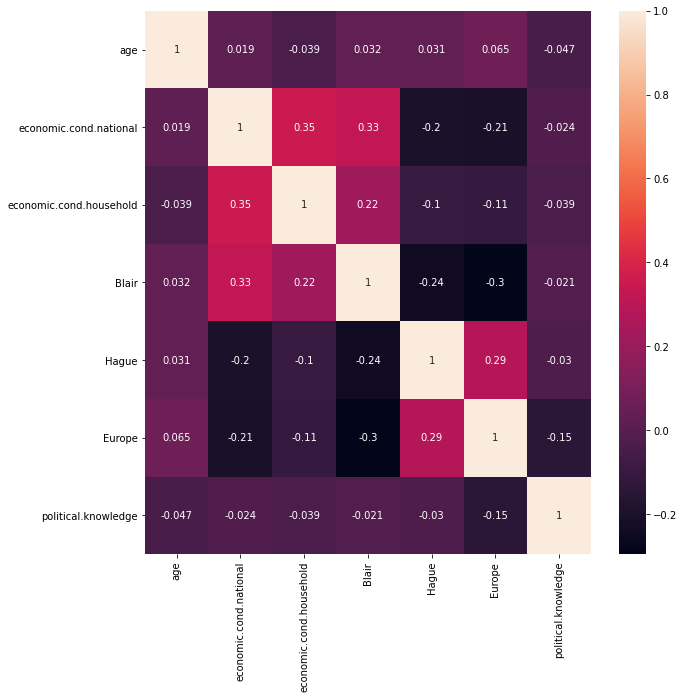

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(Election_df.corr(), annot=True)
plt.savefig("Heatmap")

## Data Preparation: 4 marks

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 

In [39]:
#Encoding the data through one hot encoding
Election_df=pd.get_dummies(Election_df,drop_first=True)

In [40]:
Election_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [ ]:
#Election_df["vote_Labour"].value_counts()

In [ ]:
#Election_df["gender_male"].value_counts()

In [41]:
Election_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 130.1 KB


### Scaling is not necessary in this case, I am not scaling the data for this problem.

In [42]:
Election_df.shape

(1517, 9)

In [43]:
#Split the data into train and test (70:30)
x = Election_df.drop("vote_Labour" , axis=1)
y = Election_df.pop("vote_Labour")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [44]:
x_train.shape

(1061, 8)

In [45]:
x_test.shape

(456, 8)

In [50]:
for feature in Election_df.columns:
    if Election_df[feature].dtype=='object':
        print(feature.upper() ," ",Election_df[feature].nunique())
        print(Election_df[feature].value_counts().sort_values())           

In [46]:
y_train.shape

(1061,)

In [47]:
y_test.shape

(456,)

## Modeling: 22 marks

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [50]:
lgr=LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True)
lda=LinearDiscriminantAnalysis()

In [51]:
model_lr_lda = [lgr,lda]

scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
accuracy_train=[]
accuracy_test=[]

for i in model_lr_lda: 
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    precision_train.append(precision_score(y_train,i.predict(x_train)))
    precision_test.append(precision_score(y_test,i.predict(x_test)))
    recall_train.append(recall_score(y_train,i.predict(x_train)))
    recall_test.append(recall_score(y_test,i.predict(x_test)))
    f1_train.append(f1_score(y_train,i.predict(x_train)))
    f1_test.append(f1_score(y_test,i.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
    


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [52]:
score_lr_lda=pd.DataFrame({'precision train': precision_train,
                    'precision test': precision_test,
                    'recall train': recall_train,
                    'recall test':recall_test,
                    'f1 train': f1_train,
                    'f1 test': f1_test,
                    'accuracy train': accuracy_train,
                    'accuracy test': accuracy_test,
                    'train score':scores_train,
                    'test score': scores_test},
            index=['Logistic Regression','Linear Discriminant Analysis'])

In [53]:
score_lr_lda

,precision train,precision test,recall train,recall test,f1 train,f1 test,accuracy train,accuracy test,train score,test score
Logistic Regression,0.860728,0.870130,0.909814,0.884488,0.884591,0.877250,0.831291,0.835526,0.831291,0.835526
Linear Discriminant Analysis,0.864899,0.864952,0.908488,0.887789,0.886158,0.876221,0.834119,0.833333,0.834119,0.833333


In [54]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,plot_roc_curve,classification_report,confusion_matrix

TRAIN DATA
Model Name:  LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg',
                   verbose=True)
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



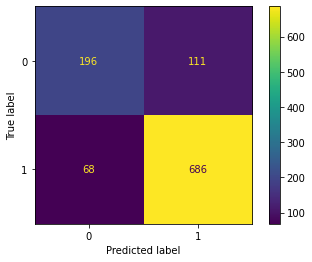

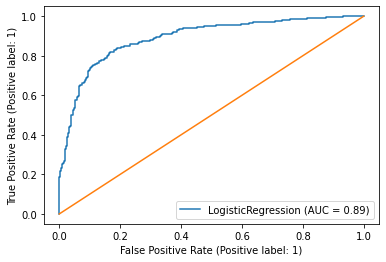

TRAIN DATA
Model Name:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



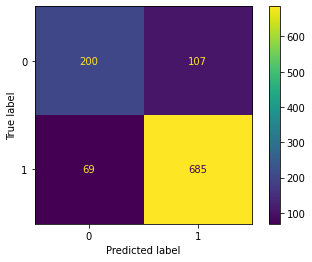

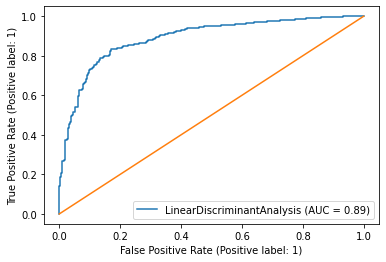

In [55]:
for i in model_lr_lda:
    print('TRAIN DATA')
    print('Model Name: ',i)
    print(metrics.classification_report(y_train, i.predict(x_train)))
    plot_confusion_matrix(i,x_train,y_train)
    plot_roc_curve(i,x_train,y_train)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()

TEST DATA
model name:  LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg',
                   verbose=True)
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



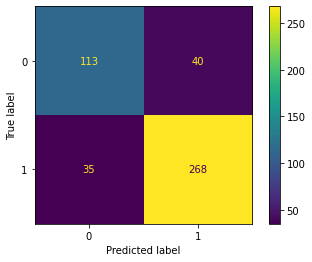

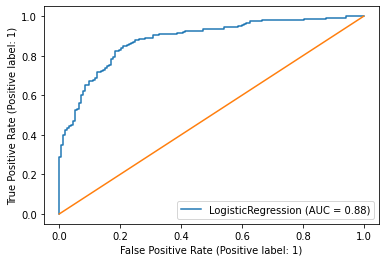

TEST DATA
model name:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



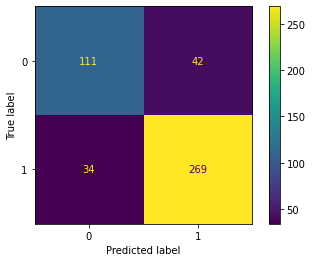

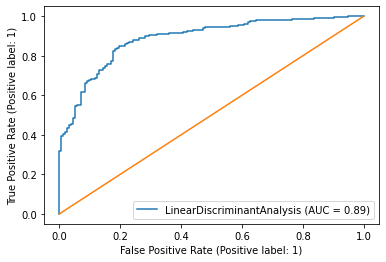

In [56]:
for i in model_lr_lda:
    print('TEST DATA')
    print('model name: ',i)
    print(metrics.classification_report(y_test, i.predict(x_test)))
    plot_confusion_matrix(i,x_test,y_test)
    plot_roc_curve(i,x_test,y_test)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()
    

In [57]:
print(metrics.confusion_matrix(y_test, i.predict(x_test)))

[[111  42]
 [ 34 269]]


In [58]:
score_lr_lda

,precision train,precision test,recall train,recall test,f1 train,f1 test,accuracy train,accuracy test,train score,test score
Logistic Regression,0.860728,0.870130,0.909814,0.884488,0.884591,0.877250,0.831291,0.835526,0.831291,0.835526
Linear Discriminant Analysis,0.864899,0.864952,0.908488,0.887789,0.886158,0.876221,0.834119,0.833333,0.834119,0.833333


## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. 

In [59]:
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.naive_bayes import GaussianNB

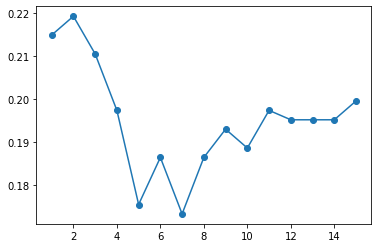

In [60]:
knn_pred=[]
for i in np.arange(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred.append(1-accuracy_score(y_test,knn.predict(x_test)))
plt.plot(np.arange(1,16), knn_pred, marker='o')



In [61]:
knn_pred

[0.2149122807017544,
 0.2192982456140351,
 0.21052631578947367,
 0.19736842105263153,
 0.17543859649122806,
 0.1864035087719298,
 0.17324561403508776,
 0.1864035087719298,
 0.19298245614035092,
 0.1885964912280702,
 0.19736842105263153,
 0.19517543859649122,
 0.19517543859649122,
 0.19517543859649122,
 0.19956140350877194]

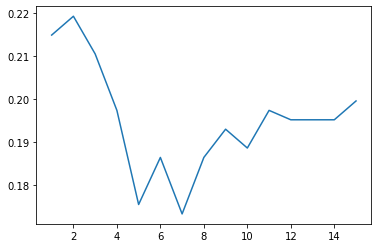

In [62]:
knn_pred=[]
for i in np.arange(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred.append(np.mean(y_test!=knn.predict(x_test)))
plt.plot(np.arange(1,16), knn_pred)

In [63]:
knn=KNeighborsClassifier()
nbm=GaussianNB()

model_knn_nbm = [knn,nbm]

scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
accuracy_train=[]
accuracy_test=[]

for i in model_knn_nbm: 
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    precision_train.append(precision_score(y_train,i.predict(x_train)))
    precision_test.append(precision_score(y_test,i.predict(x_test)))
    recall_train.append(recall_score(y_train,i.predict(x_train)))
    recall_test.append(recall_score(y_test,i.predict(x_test)))
    f1_train.append(f1_score(y_train,i.predict(x_train)))
    f1_test.append(f1_score(y_test,i.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
    

In [64]:
score_knn_nbm=pd.DataFrame({'precision train': precision_train,
                    'precision test': precision_test,
                    'recall train': recall_train,
                    'recall test':recall_test,
                    'f1 train': f1_train,
                    'f1 test': f1_test,
                    'accuracy train': accuracy_train,
                    'accuracy test': accuracy_test,
                    'train score':scores_train,
                    'test score': scores_test},
            index=['KNN Model','Naive Bayes Model'])
score_knn_nbm

,precision train,precision test,recall train,recall test,f1 train,f1 test,accuracy train,accuracy test,train score,test score
KNN Model,0.877039,0.840979,0.927056,0.907591,0.901354,0.873016,0.855796,0.824561,0.855796,0.824561
Naive Bayes Model,0.875486,0.865132,0.895225,0.867987,0.885246,0.866557,0.835061,0.822368,0.835061,0.822368


TRAIN DATA
Model Name:  KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



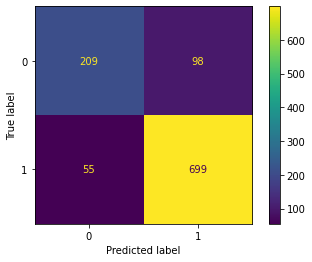

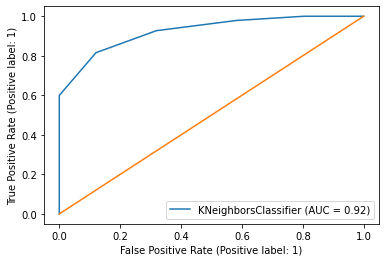

TRAIN DATA
Model Name:  GaussianNB()
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



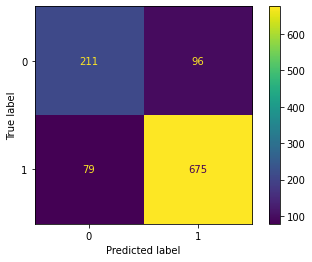

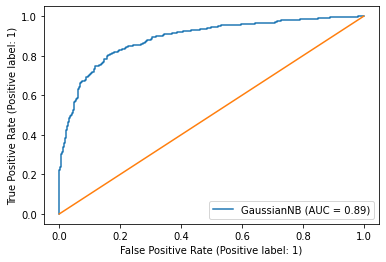

In [65]:
for i in model_knn_nbm:
    print('TRAIN DATA')
    print('Model Name: ',i)
    print(metrics.classification_report(y_train, i.predict(x_train)))
    plot_confusion_matrix(i,x_train,y_train)
    plot_roc_curve(i,x_train,y_train)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()
    

TEST DATA
Model Name:  KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



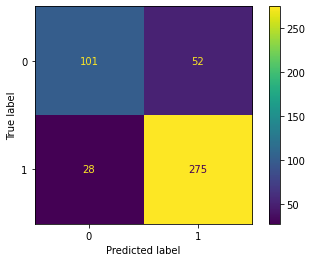

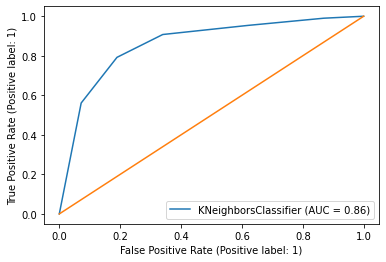

TEST DATA
Model Name:  GaussianNB()
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



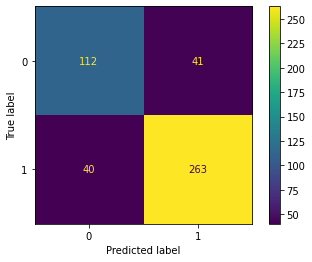

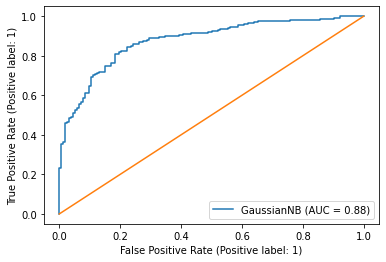

In [66]:
for i in model_knn_nbm:
    print('TEST DATA')
    print('Model Name: ',i)
    print(metrics.classification_report(y_test, i.predict(x_test)))
    plot_confusion_matrix(i,x_test,y_test)
    plot_roc_curve(i,x_test,y_test)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()
    


## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [68]:
rf=RandomForestClassifier(random_state=1)
bc=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
adab=AdaBoostClassifier(n_estimators=100,random_state=1)

In [69]:
model_bc_adab=[bc,adab]

scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
accuracy_train=[]
accuracy_test=[]

for i in model_bc_adab: 
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    precision_train.append(precision_score(y_train,i.predict(x_train)))
    precision_test.append(precision_score(y_test,i.predict(x_test)))
    recall_train.append(recall_score(y_train,i.predict(x_train)))
    recall_test.append(recall_score(y_test,i.predict(x_test)))
    f1_train.append(f1_score(y_train,i.predict(x_train)))
    f1_test.append(f1_score(y_test,i.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
    
    

In [70]:
score_bc_adab=pd.DataFrame({'precision train': precision_train,
                    'precision test': precision_test,
                    'recall train': recall_train,
                    'recall test':recall_test,
                    'f1 train': f1_train,
                    'f1 test': f1_test,
                    'accuracy train': accuracy_train,
                    'accuracy test': accuracy_test,
                    'train score':scores_train,
                    'test score': scores_test},
            index=['Bagging Model','Ada Boost Model'])

In [71]:
score_bc_adab

,precision train,precision test,recall train,recall test,f1 train,f1 test,accuracy train,accuracy test,train score,test score
Bagging Model,0.961538,0.848297,0.994695,0.904290,0.977836,0.875399,0.967955,0.828947,0.967955,0.828947
Ada Boost Model,0.880922,0.842767,0.912467,0.884488,0.896417,0.863124,0.850141,0.813596,0.850141,0.813596


TRAIN DATA
Model Name:  BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



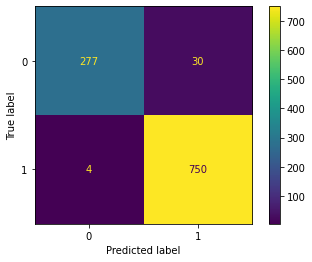

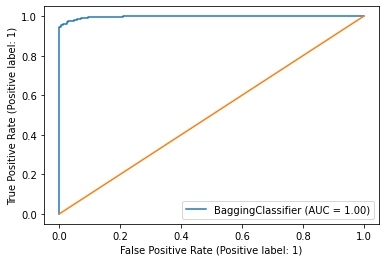

TRAIN DATA
Model Name:  AdaBoostClassifier(n_estimators=100, random_state=1)
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



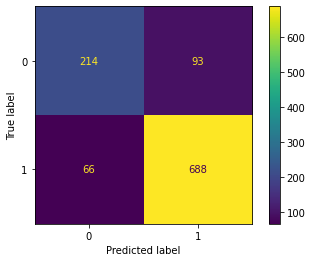

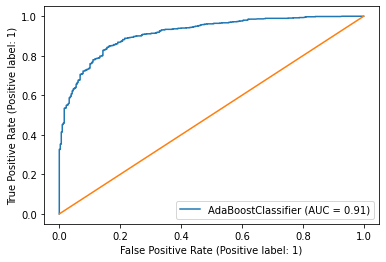

In [72]:
for i in model_bc_adab:
    print('TRAIN DATA')
    print('Model Name: ',i)
    print(metrics.classification_report(y_train, i.predict(x_train)))
    plot_confusion_matrix(i,x_train,y_train)
    plot_roc_curve(i,x_train,y_train)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()
    

test data
model name:  BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



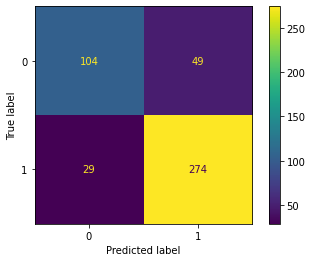

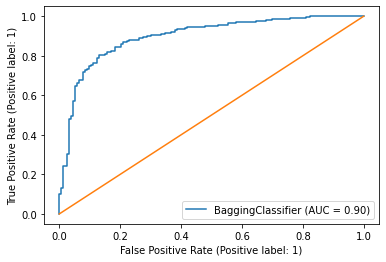

test data
model name:  AdaBoostClassifier(n_estimators=100, random_state=1)
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



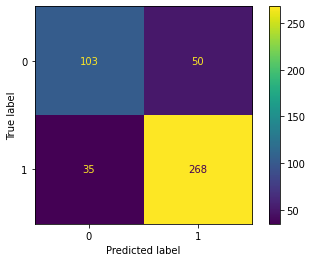

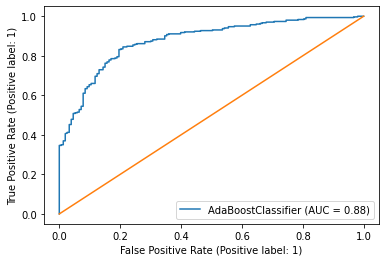

In [73]:
for i in model_bc_adab:
    print('test data')
    print('model name: ',i)
    print(metrics.classification_report(y_test, i.predict(x_test)))
    plot_confusion_matrix(i,x_test,y_test)
    plot_roc_curve(i,x_test,y_test)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()
    

### Tuning Logistic Regression,LDA,KNN,Naive Bayes,Bagging and Boosting

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# Logistic Regresssion

param_grid_lgr={'penalty':['l2','none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.0001,0.00001]}

In [76]:
lgr_grid=LogisticRegression(max_iter = 50000,random_state=1)
lgr_gs=GridSearchCV(estimator=lgr_grid,param_grid=param_grid_lgr,cv=3)

In [77]:
lgr_gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=50000, random_state=1),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]})

In [78]:
lgr_gs.best_params_

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

In [79]:
# LDA Grid search

In [80]:
params_lda={'solver' : ['svd', 'lsqr', 'eigen'],
             'tol' : [0.001,0.0001,0.00001]            
    
            }
lda_grid=LinearDiscriminantAnalysis()
lda_gs=GridSearchCV(estimator=lda_grid,param_grid=params_lda,cv=3)

In [81]:
lda_gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [82]:
lda_gs.best_params_

{'solver': 'svd', 'tol': 0.001}

In [83]:
# KNN Grid search

In [84]:
params_knn={'n_neighbors' : [2,3,7,9,11],
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [15,20,25,30,35]}
knn_grid=KNeighborsClassifier()
knn_gs=GridSearchCV(estimator=knn_grid,param_grid=params_knn,cv=3)

In [85]:
knn_gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 25, 30, 35],
                         'n_neighbors': [2, 3, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [86]:
knn_gs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 7, 'weights': 'uniform'}

In [ ]:
# Bagging Grid search

In [87]:
params_bag = {
    'n_estimators' : [300,500]
   
    }
bagging_grid =  BaggingClassifier(base_estimator=rf, random_state = 1,  verbose=False)
bagging_gs = GridSearchCV(estimator = bagging_grid, param_grid = params_bag, cv = 3)

In [88]:
bagging_gs.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                                         random_state=1, verbose=False),
             param_grid={'n_estimators': [300, 500]})

In [89]:
bagging_gs.best_params_

{'n_estimators': 300}

In [90]:
# ADABoost Grid search

In [91]:
params_ada={'n_estimators' : [200,300,500],
            'algorithm' : ['SAMME', 'SAMME.R']
           }
ada_grid= AdaBoostClassifier(random_state=1)
ada_gs=GridSearchCV(estimator=ada_grid,param_grid=params_ada,cv=3)

In [92]:
ada_gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [200, 300, 500]})

In [93]:
ada_gs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 300}

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [94]:
LGR_GS = LogisticRegression(penalty= 'l2', solver= 'liblinear', tol= 0.0001,max_iter=50000,)
LDA_GS = LinearDiscriminantAnalysis(solver= 'svd', tol= 0.001)
KNN_GS = KNeighborsClassifier(algorithm= 'brute',leaf_size= 15,n_neighbors= 9,weights= 'distance')
Bagging_GS = BaggingClassifier(base_estimator=rf,n_estimators=300,random_state=1)
ADA_BOOST_GS = AdaBoostClassifier(algorithm= 'SAMME', n_estimators= 300, random_state=1)

models=[LGR_GS, LDA_GS, KNN_GS, Bagging_GS,ADA_BOOST_GS]

scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
accuracy_train=[]
accuracy_test=[]

for i in models: 
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    precision_train.append(precision_score(y_train,i.predict(x_train)))
    precision_test.append(precision_score(y_test,i.predict(x_test)))
    recall_train.append(recall_score(y_train,i.predict(x_train)))
    recall_test.append(recall_score(y_test,i.predict(x_test)))
    f1_train.append(f1_score(y_train,i.predict(x_train)))
    f1_test.append(f1_score(y_test,i.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train,i.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(x_test)))
    
scores=pd.DataFrame({'precision train': precision_train,
                    'precision test': precision_test,
                    'recall train': recall_train,
                    'recall test':recall_test,
                    'f1 train': f1_train,
                    'f1 test': f1_test,
                    'accuracy train': accuracy_train,
                    'accuracy test': accuracy_test,
                    'train score':scores_train,
                    'test score': scores_test},
            index=['Lgr_gs','Lda_gs','Knn_gs','bagging_gs','Ada_Boost_gs'])

In [95]:
scores

,precision train,precision test,recall train,recall test,f1 train,f1 test,accuracy train,accuracy test,train score,test score
Lgr_gs,0.863579,0.861736,0.915119,0.884488,0.888603,0.872964,0.836946,0.828947,0.836946,0.828947
Lda_gs,0.864899,0.864952,0.908488,0.887789,0.886158,0.876221,0.834119,0.833333,0.834119,0.833333
Knn_gs,1.000000,0.835366,1.000000,0.904290,1.000000,0.868463,1.000000,0.817982,1.000000,0.817982
bagging_gs,0.960307,0.849231,0.994695,0.910891,0.977199,0.878981,0.967012,0.833333,0.967012,0.833333
Ada_Boost_gs,0.872475,0.855769,0.916446,0.881188,0.893920,0.868293,0.845429,0.822368,0.845429,0.822368


TRAIN DATA
Model Name:  LogisticRegression(max_iter=50000, solver='liblinear')
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



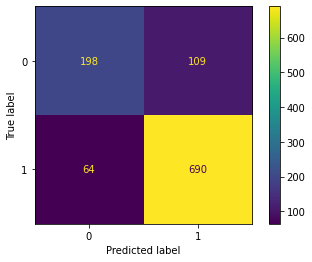

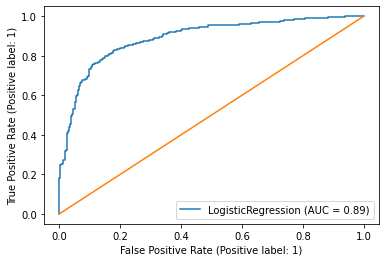

TRAIN DATA
Model Name:  LinearDiscriminantAnalysis(tol=0.001)
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



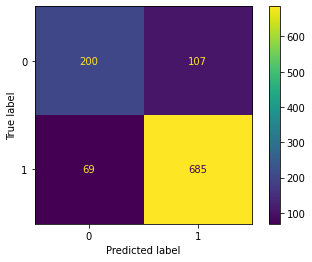

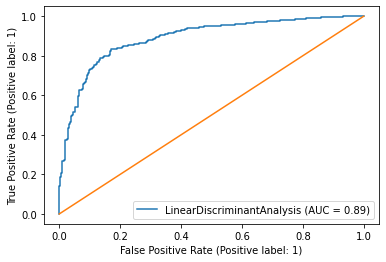

TRAIN DATA
Model Name:  KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=9,
                     weights='distance')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



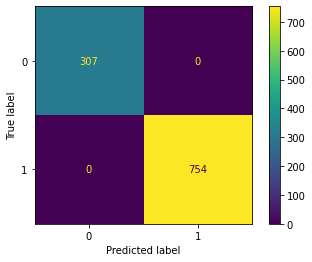

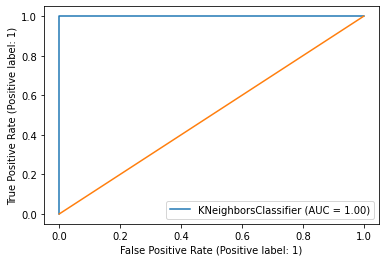

TRAIN DATA
Model Name:  BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=300, random_state=1)
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



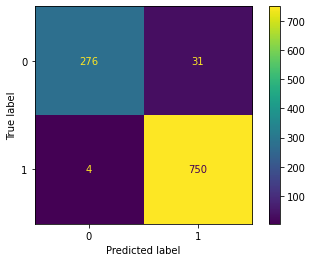

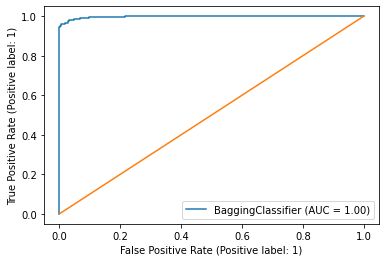

TRAIN DATA
Model Name:  AdaBoostClassifier(algorithm='SAMME', n_estimators=300, random_state=1)
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       307
           1       0.87      0.92      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.85      0.84      1061



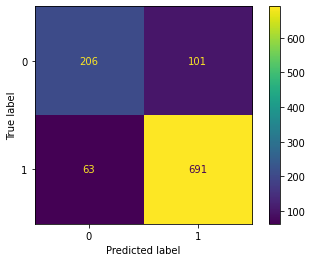

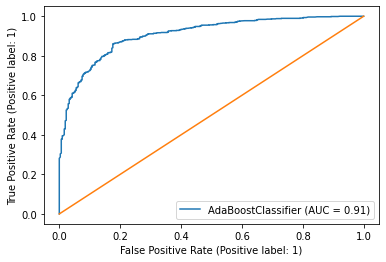

In [96]:
for i in models:
    print('TRAIN DATA')
    print('Model Name: ',i)
    print(metrics.classification_report(y_train, i.predict(x_train)))
    plot_confusion_matrix(i,x_train,y_train)
    plot_roc_curve(i,x_train,y_train)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()
    

Test DATA
Model Name:  LogisticRegression(max_iter=50000, solver='liblinear')
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



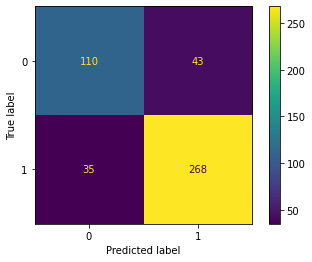

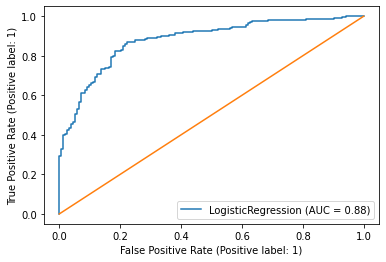

Test DATA
Model Name:  LinearDiscriminantAnalysis(tol=0.001)
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



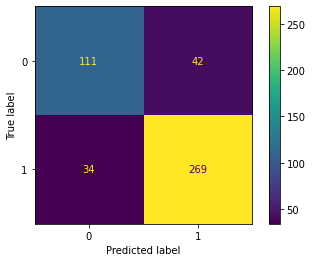

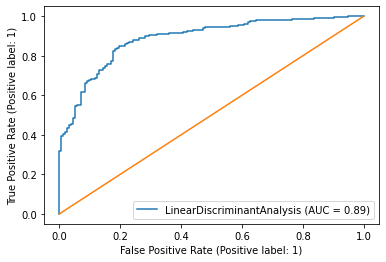

Test DATA
Model Name:  KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=9,
                     weights='distance')
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456



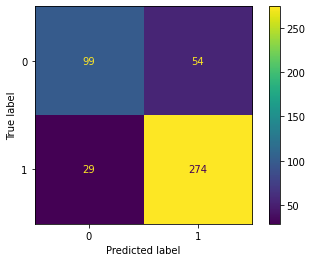

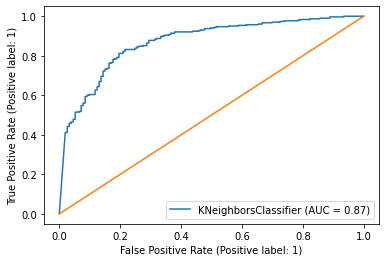

Test DATA
Model Name:  BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=300, random_state=1)
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



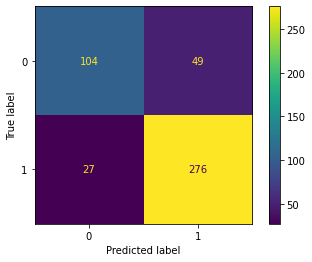

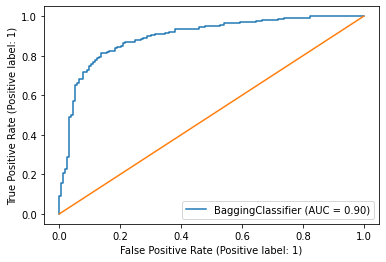

Test DATA
Model Name:  AdaBoostClassifier(algorithm='SAMME', n_estimators=300, random_state=1)
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



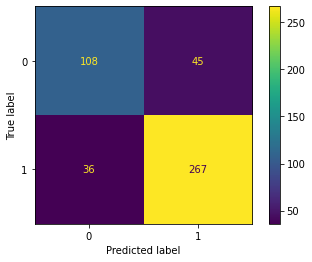

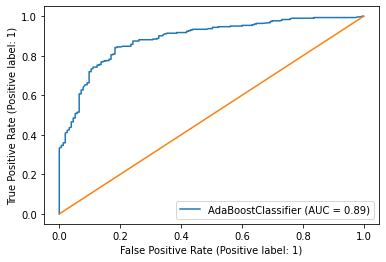

In [97]:
for i in models:
    print('Test DATA')
    print('Model Name: ',i)
    print(metrics.classification_report(y_test, i.predict(x_test)))
    plot_confusion_matrix(i,x_test,y_test)
    plot_roc_curve(i,x_test,y_test)
    plt.plot([0,1],[0,1],linestyle='-')
    
    plt.show()
    

In [98]:
df_final = pd.concat([score_lr_lda,score_knn_nbm,score_bc_adab,scores],axis=0)

In [99]:
df_final

,precision train,precision test,recall train,recall test,f1 train,f1 test,accuracy train,accuracy test,train score,test score
Logistic Regression,0.860728,0.870130,0.909814,0.884488,0.884591,0.877250,0.831291,0.835526,0.831291,0.835526
Linear Discriminant Analysis,0.864899,0.864952,0.908488,0.887789,0.886158,0.876221,0.834119,0.833333,0.834119,0.833333
KNN Model,0.877039,0.840979,0.927056,0.907591,0.901354,0.873016,0.855796,0.824561,0.855796,0.824561
Naive Bayes Model,0.875486,0.865132,0.895225,0.867987,0.885246,0.866557,0.835061,0.822368,0.835061,0.822368
Bagging Model,0.961538,0.848297,0.994695,0.904290,0.977836,0.875399,0.967955,0.828947,0.967955,0.828947
Ada Boost Model,0.880922,0.842767,0.912467,0.884488,0.896417,0.863124,0.850141,0.813596,0.850141,0.813596
Lgr_gs,0.863579,0.861736,0.915119,0.884488,0.888603,0.872964,0.836946,0.828947,0.836946,0.828947
Lda_gs,0.864899,0.864952,0.908488,0.887789,0.886158,0.876221,0.834119,0.833333,0.834119,0.833333
Knn_gs,1.000000,0.835366,1.000000,0.904290,1.000000,0.868463,1.000000,0.817982,1.000000,0.817982
bagging_gs,0.960307,0.849231,0.994695,0.910891,0.977199,0.878981,0.967012,0.833333,0.967012,0.833333


Model Comparison:

This is a process through which we will compare all models build and find the best optimised among all the models. Here, I am comparing the six models I have trained before tuning and after tuning the model.
The basis on which models are evaluated are known as performance metrics. 
The metrics on which model will be evaluated are:
- Accuracy
- AUC
- Precision
- F1-Score


Observations:

- All the models performed well with slight difference ranging from (1-5%).

- Performance can be slightly improved, if applied after scaling the data for the Distance based algorithms.

- Best Optimised Model – On the basis of all the comparisons and performance metrics. Both the LDA and Logistic regression performed well. Compared to both, I consider Logistic Regression as the best optimised model.

Inference: 5 marks

### 1.8 Based on these predictions, what are the insights? 

## Insights and Recommendations:
Our main Business Objective is – “To Build a model, to predict which party a voter will vote for, on the basis of the given information to create an exit poll that will help in predicting overall win and seats covered by a particular party.”
- We have used Logistic Regression Model for predicting the outcome, as it has the best optimised performance compared to rest of the models.
- Hyper-parameter tuning is an important aspect of model building.
- There are limitations to hyper- parameter tuning, as to process these combinations huge amount of processing power is required.
- But if tuning is done with many sets of parameters, then we might get even better results.
- Gathering more data, and having good understanding about each feature in the dataset will help in training the models and helpful in improving their predictive powers.
- Boosting models can also perform well even without tuning. If we perform hyper-parameter tuning, there is a chance of getting better results.
- We can also create a function in which all the models predict the outcome in sequence. This will help in better understanding and the probability of what the outcome will be.


## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

(Hint: use .words(), .raw(), .sent() for extracting counts)

2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

2.2 Remove all the stopwords from all three speeches. – 3 Marks

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

Code Snippet to extract the three speeches:



In [112]:
"""
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"""

"\nimport nltk\nnltk.download('inaugural')\nfrom nltk.corpus import inaugural\ninaugural.fileids()\ninaugural.raw('1941-Roosevelt.txt')\ninaugural.raw('1961-Kennedy.txt')\ninaugural.raw('1973-Nixon.txt')\n"

In [113]:
import nltk
import random
import string
import pandas as pd

In [114]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Manisha\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [115]:
from nltk.corpus import inaugural

In [116]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [117]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [118]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [119]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [120]:
df = pd.DataFrame({'text':[inaugural.raw('1941-Roosevelt.txt'),inaugural.raw('1961-Kennedy.txt'),inaugural.raw('1973-Nixon.txt')],
                       'fileid':['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']}, columns=['text', 'fileid'])

In [121]:
df

,text,fileid
0,On each national day of inauguration since 178...,1941-Roosevelt.txt
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1961-Kennedy.txt
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1973-Nixon.txt


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3 non-null      object
 1   fileid  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [158]:
df.shape

(3, 2)

### 2.1 Find the number of characters, words, and sentences for the mentioned documents. 

In [122]:
print('Number of characters in the fileid {}: {}'.format('1941-Roosevelt.txt',len(inaugural.raw('1941-Roosevelt.txt'))))

print('Number of characters in the fileid {}: {}'.format('1961-Kennedy.txt',len(inaugural.raw('1961-Kennedy.txt'))))

print('Number of characters in the fileid {}: {}'.format('1973-Nixon.txt',len(inaugural.raw('1973-Nixon.txt'))))

Number of characters in the fileid 1941-Roosevelt.txt: 7571
Number of characters in the fileid 1961-Kennedy.txt: 7618
Number of characters in the fileid 1973-Nixon.txt: 9991


In [123]:
print('Number of words in the fileid {}: {}'.format('1941-Roosevelt.txt',len(inaugural.words('1941-Roosevelt.txt'))))

print('Number of words in the fileid {}: {}'.format('1961-Kennedy.txt',len(inaugural.words('1961-Kennedy.txt'))))

print('Number of words in the fileid {}: {}'.format('1973-Nixon.txt',len(inaugural.words('1973-Nixon.txt'))))

Number of words in the fileid 1941-Roosevelt.txt: 1536
Number of words in the fileid 1961-Kennedy.txt: 1546
Number of words in the fileid 1973-Nixon.txt: 2028


In [124]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
print('Number of sentences in the fileid {}: {}'.format('1941-Roosevelt.txt',len(inaugural.sents('1941-Roosevelt.txt'))))

print('Number of sentences in the fileid {}: {}'.format('1961-Kennedy.txt',len(inaugural.sents('1961-Kennedy.txt'))))

print('Number of sentences in the fileid {}: {}'.format('1973-Nixon.txt',len(inaugural.sents('1973-Nixon.txt'))))

Number of sentences in the fileid 1941-Roosevelt.txt: 68
Number of sentences in the fileid 1961-Kennedy.txt: 52
Number of sentences in the fileid 1973-Nixon.txt: 69


### 2.2 Remove all the stopwords from all three speeches. 

In [162]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
stopwords_41= nltk.corpus.stopwords.words('english') + list(string.punctuation)

stopwords_41.extend(['--', 'us', 'let',])

stopwords_41

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [128]:
words_1941= inaugural.words('1941-Roosevelt.txt')
words_1941= [word.lower() for word in words_1941]
all_words_cleaned_1941= [word for word in words_1941 if word not in stopwords_41]

print(all_words_cleaned_1941)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future', 'freedom', 'ebbing',

In [129]:
len(all_words_cleaned_1941)

623

In [130]:
stopwords_61= nltk.corpus.stopwords.words('english') + list(string.punctuation)

stopwords_61.extend(['--','let','us'])

stopwords_61

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [131]:
words_1961= inaugural.words('1961-Kennedy.txt')
words_1961= [word.lower() for word in words_1961]
all_words_cleaned_1961= [word for word in words_1961 if word not in stopwords_61]
print(all_words_cleaned_1961)

['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'world', 'different', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'americans', 'born', 'century', 'tempered', 'war', 'disc

In [132]:
len(all_words_cleaned_1961)

669

In [133]:
stopwords_73= nltk.corpus.stopwords.words('english') + list(string.punctuation)

stopwords_73.extend(['--','us','let'])

stopwords_73

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [134]:
words_1973= inaugural.words('1973-Nixon.txt')
words_1973= [word.lower() for word in words_1973]
all_words_cleaned_1973= [word for word in words_1973 if word not in stopwords_73]

print(all_words_cleaned_1973)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'central', 'question', 'shall', 'use', 'peace', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'far', 'reaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'able', 'establish', 'base', 'new', 'durable', 'p

In [135]:
len(all_words_cleaned_1973)

788

In [136]:
print('Number of words in the fileid {}: {}'.format('1941-Roosevelt.txt',len(all_words_cleaned_1941)))

print('Number of words in the fileid {}: {}'.format('1961-Kennedy.txt',len(all_words_cleaned_1961)))

print('Number of words in the fileid {}: {}'.format('1973-Nixon.txt',len(all_words_cleaned_1973)))

Number of words in the fileid 1941-Roosevelt.txt: 623
Number of words in the fileid 1961-Kennedy.txt: 669
Number of words in the fileid 1973-Nixon.txt: 788


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [137]:
nltk.FreqDist(all_words_cleaned_1941).most_common(15)

[('nation', 12),
 ('know', 10),
 ('spirit', 9),
 ('life', 9),
 ('democracy', 9),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6),
 ('human', 5),
 ('men', 5),
 ('new', 5),
 ('body', 5),
 ('mind', 5),
 ('speaks', 5)]

In [138]:
nltk.FreqDist(all_words_cleaned_1961).most_common(15)

[('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5),
 ('nations', 5),
 ('ask', 5),
 ('president', 4),
 ('fellow', 4),
 ('freedom', 4),
 ('man', 4),
 ('first', 4)]

In [139]:
nltk.FreqDist(all_words_cleaned_1973).most_common(15)

[('america', 21),
 ('peace', 19),
 ('world', 18),
 ('new', 15),
 ('nation', 11),
 ('responsibility', 11),
 ('government', 10),
 ('great', 9),
 ('home', 9),
 ('abroad', 8),
 ('together', 7),
 ('years', 7),
 ('shall', 7),
 ('policies', 7),
 ('role', 7)]

In [140]:
nltk.FreqDist(all_words_cleaned_1941).most_common(3) #top 3 words

[('nation', 12), ('know', 10), ('spirit', 9)]

In [141]:
nltk.FreqDist(all_words_cleaned_1961).most_common(3) #top 3 words

[('world', 8), ('sides', 8), ('new', 7)]

In [142]:
nltk.FreqDist(all_words_cleaned_1973).most_common(3) #top 3 words

[('america', 21), ('peace', 19), ('world', 18)]

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [148]:
!pip install wordcloud

In [149]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

For: 1941-Roosevelt.txt


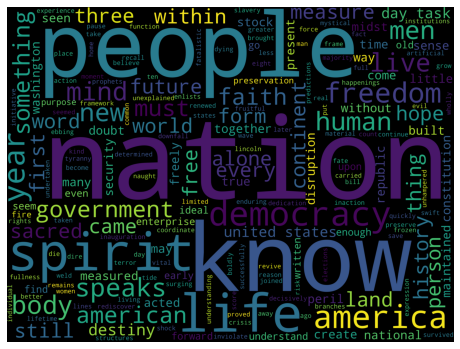

In [154]:
wrd_cloud_1 = WordCloud(stopwords=STOPWORDS,width=4000,height=3000 ).generate(' '.join(all_words_cleaned_1941))
print('For: {}'.format('1941-Roosevelt.txt'))
plt.figure(figsize=(8,8))
plt.imshow(wrd_cloud_1)
plt.axis('off')
plt.show()

For: 1961-Kennedy.txt


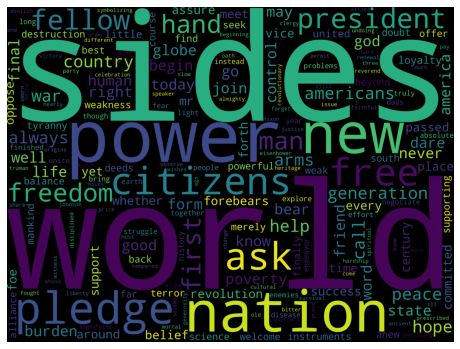

In [155]:
wrd_cloud_2 = WordCloud(stopwords=STOPWORDS,width=4000,height=3000 ).generate(' '.join(all_words_cleaned_1961))
print('For: {}'.format('1961-Kennedy.txt'))
plt.figure(figsize=(8,8))
plt.imshow(wrd_cloud_2)
plt.axis('off')
plt.show()

For: 1973-Nixon.txt


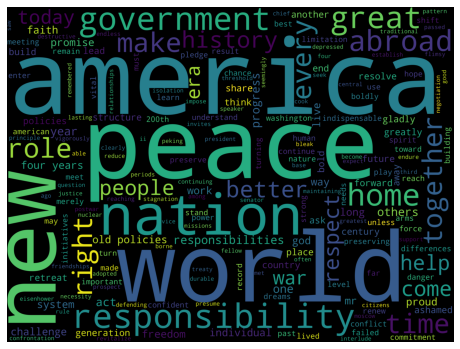

In [156]:
wrd_cloud_3 = WordCloud(stopwords=STOPWORDS,width=4000,height=3000 ).generate(' '.join(all_words_cleaned_1973))
print('For: {}'.format('1973-Nixon.txt'))
plt.figure(figsize=(8,8))
plt.imshow(wrd_cloud_3)
plt.axis('off')
plt.show()

## Insights:

- Our Objective was to look at all the three speeches and analyse them. To find the strength and sentiment of the speeches.
- Based on the outputs we can see that there are some similar words that are present in all speeches.
- these words may be the point which inspired many people and also get them the seat of the president of United States of America.
- Among all these speeches “nation” is the word that is significantly highlighted in all the three speeches.


## THE END!!